In [1]:
import numpy as np
import gd as g
import matplotlib.pyplot as plt

In [43]:
n = 10
A = np.eye(n) * np.arange(1,11)
b = np.ones(n)
x0 = np.zeros(n)

In [9]:
func = lambda x: 0.5 * (A @ x - b).T @ (A @ x - b)
grad = lambda x, i : A[i] * ( A[i].T @ x - b[i])
grad_full = lambda x: A.T @ ( A @ x - b)

In [11]:
print(grad_full(x0))

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]


In [88]:
def MiG(x0, m, itera, grad, grad_full, func, eps=1e-5):
    xk = x0
    L = np.amax(np.linalg.eigh(A.T @ A)[0])
    matr_x = x0
    matr_x_avg = np.zeros(10)
    res = [func(xk)]
    for k in range(itera):
        now_gr = grad_full(xk)
        tet = 2 / (k + 5)
        param_n = 1 / (4 * L * tet)
        for i in range(m):
            j = np.random.randint(0,10)
            tmp = tet * matr_x + (1 - tet) * xk
            tmp_grad = grad(tmp, j) - grad(xk, j) + now_gr/n
            matr_x = matr_x - tmp_grad * param_n
            matr_x_avg = (matr_x_avg * i + matr_x) / (i + 1)
        xk = tet * matr_x_avg + (1 - tet) * xk
        res.append(func(xk))
    print(xk)
    return res

In [91]:
res = MiG(x0, 400, 100, grad, grad_full, func)

[0.99985479 0.50000037 0.33333333 0.25       0.2        0.16666667
 0.14285714 0.125      0.11111111 0.1       ]


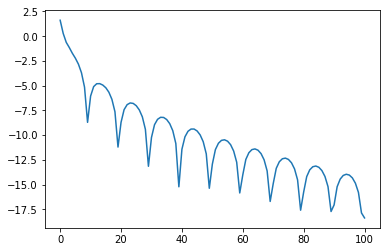

In [92]:
plt.plot(np.log(res))
plt.show()

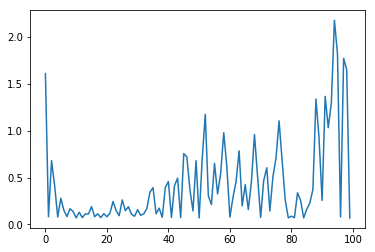

In [21]:
plt.plot(np.log(res))
plt.show()

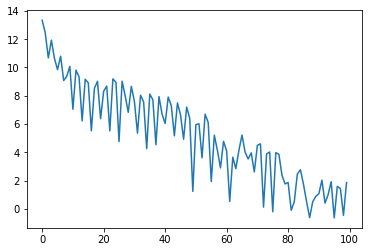

In [121]:
plt.plot(np.log(res))
plt.show()